# HW3, CHEE 6397 (Data-Driven Materials Modeling)

#### **Topics**: Unsupervised Learning -- Dimension Reduction & Clustering

#### **Due**: November 7, 2023


## Instructions

- The file you submit should be named as `hw3-<FirstName>_<LastName>-<UHID>.ipynb`, e.g. `hw3-Mingjian_Wen-00001111.ipynb`.
- Input your answer to each question in the `Answer` cell. Feel free add to more cells as needed.

- Do not delete the question and scores cells.
 
### Markdown and Math

- You can use `markdown` cell to type the text part of your answers to a question. And math equations can be typed using LaTex.
- See https://gtribello.github.io/mathNET/assets/notebook-writing.html for a quick intro to markdown in Jupyter and how to write math equations.
- See https://ia.wikipedia.org/wiki/Wikipedia:LaTeX_symbols for a list of LaTex symbols.
- If you are more used to MS Word equation typesetting, you can find a graphical LaTex equations generator at: https://latexeditor.lagrida.com

### Code

- Your Python code to a question can be written using the `code` cell.
- Make sure all used packages are imported properly. For example, before submission, do `Kernel->Restart and Run All Cells...` from the menu bar to double check. If we cannot run your notebook, we won't be able to grade it.


## Scores

Problem 1

- a [5 points]:
- b [15 points]:
- c [10 points]:
- d [20 points]:
- e [10 points]:

Problem 2

- a [5 points]:
- b [10 points]:
- c [5 points]:
- d [10 points]:
- e [10 points]:

Total: 


---
---


## Problem 1

In this problem, we explore the use of PCA and t-SNE/UMAP/TMAP for dimension reduction and visualization of high-dimensional data.

### Dataset 

The dataset we will use is the USPTO chemical reactions data. We are not going to use the original dataset, but a preprocessed version with the features already computed. 
The preprocessed data is from the bleow paper:

- *Improving machine learning performance on small chemical reaction data with unsupervised contrastive pretraining* by Wen et al,
- DOI: https://doi.org/10.1039/D1SC06515G

The purpose here is to visualize the reactions by their family, like what is done in Fig. 5 (fine-tuned) in the paper.



### Data files 

Two files are provided: 
- `reaction_features_finetuned.npy` consists of the features of reactions computed by a fined-tuned model detailed in the paper (for this problem, we don't need to worry about how they are computed). The data is a 2D array, and each row is the features for a reaction. 
- `reaction_super_family.npy` consists of the super family labels for each reaction (the values are 1, 2, ... 8; see Fig. 5 in the paper for what they mean). The data is a 1D array, and each element is the super family label for a reaction.
- The two files are in consistent order, e.g., the first row in `reaction_features_finetuned.npy` is the features of the first reaction, and its super family label is the first component in `reaction_super_family.npy`.

### (a)

- Load the features matrix and assign it to `X`.
- Load the labels and assign to `y`.
- How many chemical reactions (data points) are there in the dataset?
- How many features are there for each reaction?

Hint: `numpy.load()` can be used to read `.npy` files.

### Answer


In [554]:
import numpy as np

X = np.load("reaction_features_finetuned.npy")
y = np.load("reaction_super_family_finetuned.npy")


In [555]:
print("Number of chemical reactions:", X.shape[0])
print("Number of features for each reaction:", X.shape[1])

Number of chemical reactions: 4492
Number of features for each reaction: 128


### (b)

- Perform PCA for the features `X` and reduce the dimension to 2.
- Plot the first two principal components of the reactions (2D scatter plot). Color the reactions by their super family labels `y`. 


### Answer  

In [556]:
from sklearn.decomposition import PCA
dimension = 2
pca_1 = PCA(n_components=dimension, random_state=26)

X_reduced_1b = pca_1.fit_transform(X)
X_reduced_1b


array([[-1.0463305 , -2.8283339 ],
       [-0.89338803, -1.280917  ],
       [-1.2921572 , -2.9526956 ],
       ...,
       [ 1.4547392 , -2.5990102 ],
       [ 0.5128908 , -2.2951052 ],
       [ 1.231939  , -3.296655  ]], dtype=float32)

In [557]:
# Define a list of 8 different colors
colors = ['red', 'blue', 'lime', 'black', 'purple', 'olive', 'cyan', 'orange']
y_count = [0] * (max(y))
y_colors = [0] * len(y)
for i in range(0,len(y)):
    y_colors[i] = colors[y[i]-1]
    y_count[y[i]-1] += 1

print("labels distribution")
y_count

labels distribution


[1368, 785, 493, 781, 296, 99, 184, 486]

Text(0, 0.5, 'Second principal component')

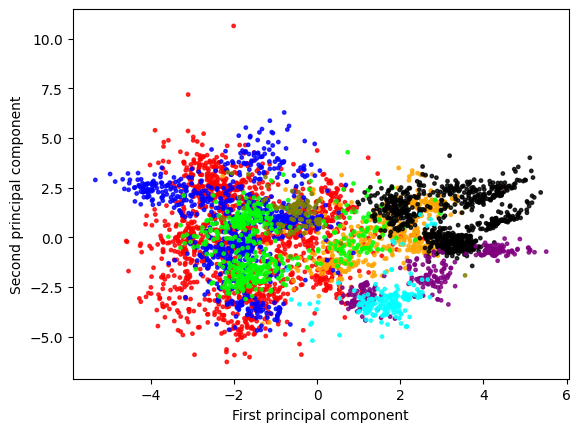

In [558]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_reduced_1b[:,0], X_reduced_1b[:,1], color=y_colors, alpha=0.8, s=6)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")

### (c)

- Is PCA with two principle components good enough for capturing the patterns in the reactions? Why or why not?
- If we want to obtain an explained variance ratio of 0.8, how many principal components do we need to keep?

### Answer

In [559]:
exp_var_ratio  = pca_1.explained_variance_ratio_
print(exp_var_ratio.cumsum())

[0.10602643 0.1867146 ]


The variance of PCA with 2 principle components is only 0.18. Which is not enough to capture the patterns in the reactions. Also, visually, the graph of PCA with 2 components above does not show a strong distinction between labels.

In [560]:
pca_2 = PCA(n_components=X.shape[1],random_state=26)
X_reduced_2 = pca_2.fit_transform(X)

sum_var = 0
num = 1
for idx, component in enumerate(pca_2.explained_variance_ratio_):
    sum_var = sum_var + component
    if sum_var >= 0.8:
        num = num + idx
        break
print("Minimum number of principal components to obtain an explained variance ratio of 0.8:",num)

Minimum number of principal components to obtain an explained variance ratio of 0.8: 21


### (d)

- Select one of t-SNE, UMAP, or TMAP, and perform dimension reduction for the features `X` to 2D. (UMAP/TMAP is not available in scikit-learn, you need to install from their respective repos.)
- Plot the 2D embedding of the reactions. Color the reactions by their super family labels `y`.
- You might need to tune the hyperparameters of the dimension reduction method to get a good result. Explain what are the import hyperparameters you choose to tune and how you tune them. 

### Answer

The learning rate is chosen at n/12, where n is the number of features in the dataset. The perflexity doesn't seem to have much effect at different values.

In [567]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate= 4492/12,random_state=26)
tsne_reduced = tsne.fit_transform(X)
tsne_reduced.shape

(4492, 2)

Text(0, 0.5, 'Second principal component')

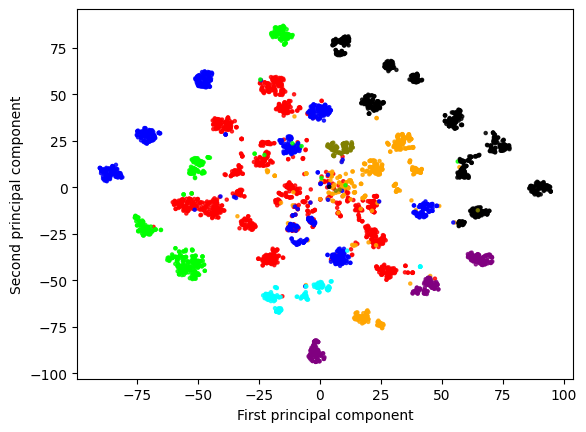

In [568]:
fig, ax = plt.subplots()
ax.scatter(tsne_reduced[:,0], tsne_reduced[:,1], color=y_colors, alpha=0.8, s=5)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")

### (e)

- Is the visualization obtained from t-SNE/UMAP/TMAP better than that by PCA? Why or why not?
- How does the visualization compare with Fig. 5 (Fine-tuned) in the paper? If it is not as good, any explanation why?

### Answer

* The graph from t-SNE shows better distinction between labels. We can see most of the labels (color) are clustered together and do not mix together like in PCA. Only at the origin region (0,0) shows some mixing between different labels.

* Compared to Fig. 5 in the paper, the t-SNE result is not as good, especially at the origin. This could be due to the difference in methods (the paper uses TMAP) and this t-SNE is not as thoroughly finetuned as the paper. 

---


## Problem 2

This problem evaluate the performance of k-means for the USPTO chemical reactions data used in Problem 1.


In most cases, we don't have the true labels for the data. Then the quality of a clustering algorithm can be evaluated by metrics such as the [Silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20value%20is%20a,poorly%20matched%20to%20neighboring%20clusters.), which measures how similar a data point is to its own cluster compared to other clusters. 

Here, we have the super family labels for the reactions, and we can then evaluate the performance of the clustering algorithms using classification metrics.

### (a)

- Perform k-means clustering on the features `X`. Note, set `n_clusters` parameter for k-means to get the correct number of clusters of you are using scikit-learn.
- Then obtain the cluster info for the reactions.  

### Answer 

* Examine the silhouette scores and inertia with different number of clusters

In [572]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# X_normalized = preprocessing.normalize(X)
# X_normalized = X
n = 1
num_cluster = list(range(2,120))
score_y = []
inertia_y = []
for i in num_cluster:
    kmeans_result = KMeans(n_clusters=i, random_state=26,n_init='auto').fit(X)
    score_y.append(silhouette_score(X,kmeans_result.labels_))
    inertia_y.append(kmeans_result.inertia_)

Text(0, 0.5, 'Silhouette score')

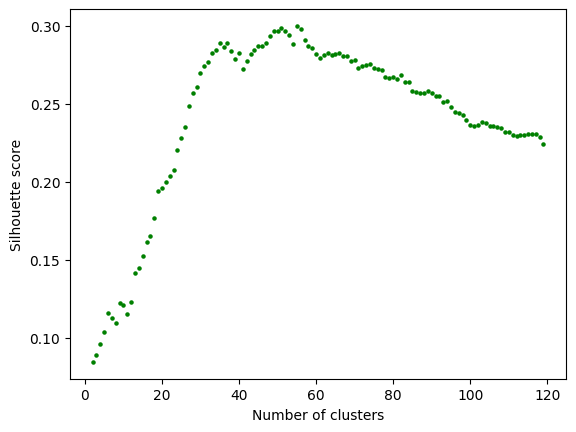

In [573]:
plt.scatter(num_cluster, score_y, s=5,c='green')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")

Text(0, 0.5, 'Inertia')

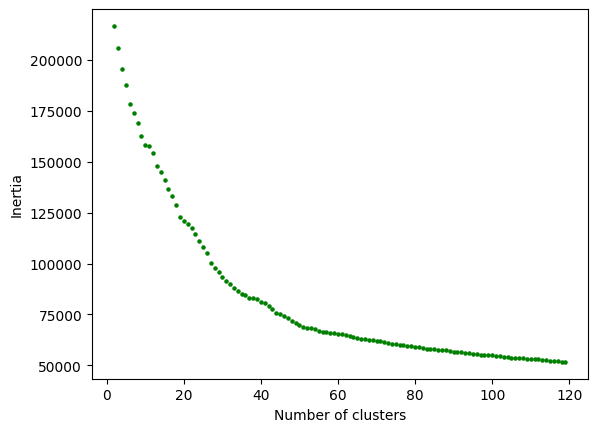

In [574]:
plt.scatter(num_cluster, inertia_y, s=5,c='green')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

* Using the silhouette score and inertia graph (elbow rule), we can estimate that k-means perform best at around 30 clusters.

In [575]:
kmeans_result = KMeans(n_clusters=30, random_state=26,n_init='auto').fit(X)
cluster_pred = kmeans_result.labels_
print("Silhouette score of ", silhouette_score(X,kmeans_result.labels_))
print("The inertia is", kmeans_result.inertia_)

Silhouette score of  0.26970682
The inertia is 93194.8046875


### (b)

Compute the precision, recall, and F1 scores for the k-means clustering results. This is a multi-class problem, so if you are using the scikit-learn metric functions, you need to set the `average` parameter properly. Justify your choice of the `average` parameter, i.e. why you choose that particular value.


We can evaluate the performance of k-means by comparing the `predicted labels` with the `super family labels` (`y` in problem 1b). Here, it is a bit tricky to get the `predicted labels` -- one cannot simply use the cluster index as the predicted label, because the numbering of the cluster does not matter. For example, the indices of cluster 0 and cluster 3 can be switched and it is still the same clustering.

Therefore, we need to find a way to match each cluster to a super family label. This is achieved in the below way: for each cluster, we find the super family label that is most frequent in the cluster, and assign this label for all data points in the cluster. You can use the `convert_clusters_to_predicted_labels()` function below to achieve this.


In [576]:
import collections
import numpy as np

def convert_clusters_to_predicted_labels(clusters, true_labels):
    """
    Assign predicted label for the cluster data points.

    The predicted label is the most frequent true label in the cluster. All data points
    in a cluster are assigned the same predicted label.

    Args:
        clusters (1D array): predicted cluster info for each sample
        true_labels (1D array): true label (super family) for each sample

    Returns:
        1D array: predicted label for each sample
    """
    clusters = np.asarray(clusters)
    true_labels = np.asarray(true_labels)

    clusters_set = list(set(clusters))

    predicted_label = np.zeros(len(true_labels)) - 1
    for c in clusters_set:
        mask = (clusters == c)
        true_lb = true_labels[mask]
        pred_lb = collections.Counter(true_lb).most_common(1)[0][0]
        predicted_label[mask] = pred_lb

    if not (predicted_label> 0).all():
        raise ValueError('Some samples are not assigned to any cluster')

    return predicted_label


### Answer

In [577]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = convert_clusters_to_predicted_labels(cluster_pred,y)
f_score   =        f1_score(y_true=y, y_pred=y_pred, average='macro',zero_division=0)
precision = precision_score(y_true=y, y_pred=y_pred, average='macro',zero_division=0)
recall    =    recall_score(y_true=y, y_pred=y_pred, average='macro',zero_division=0)
print("Precision: {}\nRecall: {}\nF1 Score: {}".format(precision,recall,f_score))


Precision: 0.9101911277901336
Recall: 0.9256412876918584
F1 Score: 0.9123881266943954


* The option `macro` is chosen for the average because it's the unweighted mean of the F1 scores of all labels.

### (c)

Based on your metric scores in (b), how good is k-means for capturing the super family labels? Justify your answer.

### Answer

With the score of 0.912, k-means with 30 clusters is effective to capture the labels. The silhouette of 0.27 is not far from the maximum of 0.30 when the cluster number is 53.

### (d)

We suspect that the performance might be improved (i.e. higher precision, recall, and F1 score) if we first use PCA to reduce the dimensionality of the features, and then perform k-means clustering on the reduced features. Let's verify our suspicion, by doing the following:
- Perform PCA on the features `X` to reduce the dimensionality. 
- Perform k-means clustering on the reduced features and then compute the precision, recall, and F1 score for the k-means clustering results.

Hint: 
- You might need to tune the number of principal components to keep in PCA to get the best performance. 
- If you are using scikit-learn, both the `PCA` and `KMeans` classes have random states, and you can set them to make the results reproducible.

### Answer 

* We can examine the Silhouette score and inertia for different number of components in PCA with different number of clusters

In [547]:
pca_comp = list(range(4,50,4))
num_cluster_2 = list(range(2,50,2))
sil_score = []
inertia = []

for i1, n in enumerate(pca_comp):
    pca_3 = PCA(n_components=n,random_state=26)
    X_reduced_2 = pca_3.fit_transform(X)
    score = []
    iner = []
    for i2, val in enumerate(num_cluster_2):
        kmeans_res  = KMeans(n_clusters=val, random_state=26,n_init='auto').fit(X_reduced_2)
        score.append(silhouette_score(X=X,labels=kmeans_res.labels_))
        iner.append(kmeans_res.inertia_)
    sil_score.append(score.copy())
    inertia.append(iner.copy())

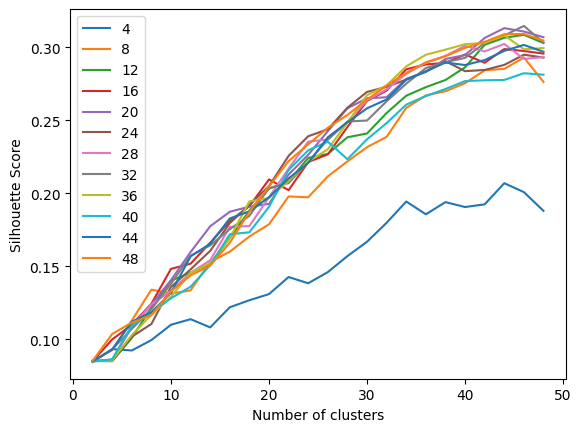

In [578]:
for idx, val in enumerate(pca_comp):
    plt.plot(num_cluster_2,sil_score[idx], label = val)

plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()


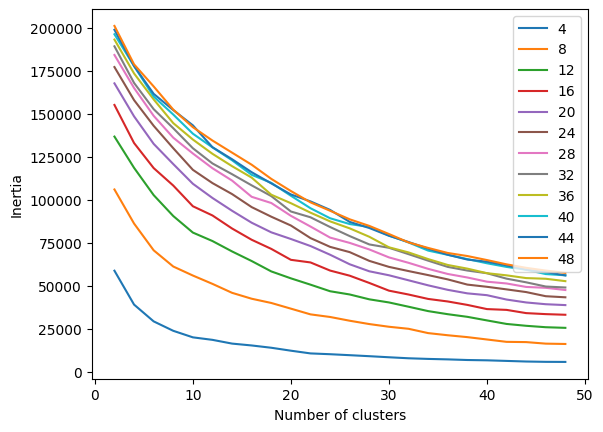

In [579]:
for idx, val in enumerate(pca_comp):
    plt.plot(num_cluster_2, inertia[idx], label = val)

plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [580]:
pca_3 = PCA(n_components=28,random_state=26)
X_reduced_2 = pca_3.fit_transform(X)
kmeans_result_2  = KMeans(n_clusters=30, random_state=26,n_init='auto').fit(X_reduced_2)
cluster_pred_2 = kmeans_result_2.labels_
y_pred_2 = convert_clusters_to_predicted_labels(cluster_pred_2,y)
f_score_2   =        f1_score(y_true=y, y_pred=y_pred_2, average='macro',zero_division=0)
precision_2 = precision_score(y_true=y, y_pred=y_pred_2, average='macro',zero_division=0)
recall_2    =    recall_score(y_true=y, y_pred=y_pred_2, average='macro',zero_division=0)
print("Precision: {}\nRecall: {}\nF1 Score: {}".format(precision_2,recall_2,f_score_2))

Precision: 0.9345730145229163
Recall: 0.9344036637057432
F1 Score: 0.9309951442846122


### (e) 
- What is the number of principal components you choose in (d) that gives the best performance? 
- Is our hypothesis in (d) correct? If yes, any reason why PCA helps? If not, any explanation why?

### Answer

In [581]:
pca_2.explained_variance_ratio_.cumsum()[27]

0.8622737

* Using the same number of clusters (30), the algorithm performs better after applying PCA with 28 components. The F1 score has risen from 0.9124 to 0.9310.
* Compared to the explained variance ratio in question 1, the number of principal components in part (d) has a variance of 0.86, which is sufficient to represent the dataset with minimal loss of data and without using all 128 features.